# 1. Linear Regression
- Task: we are consultants and want to investigate the relation between money spent on advertising and sales of particular products
- Dataset: Sales in 200 different markets, and advertisement budgets for TV, Radio and newspaper
- Sales are in thousands of units
- Budgets are in thousands of dollars



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# increase seaborn default resolution
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(5,6)})

In [3]:
# load dataset
advertising_df = pd.read_csv('C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Advertising.csv', index_col=None)

In [4]:
advertising_df

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<Axes: xlabel='newspaper', ylabel='sales'>

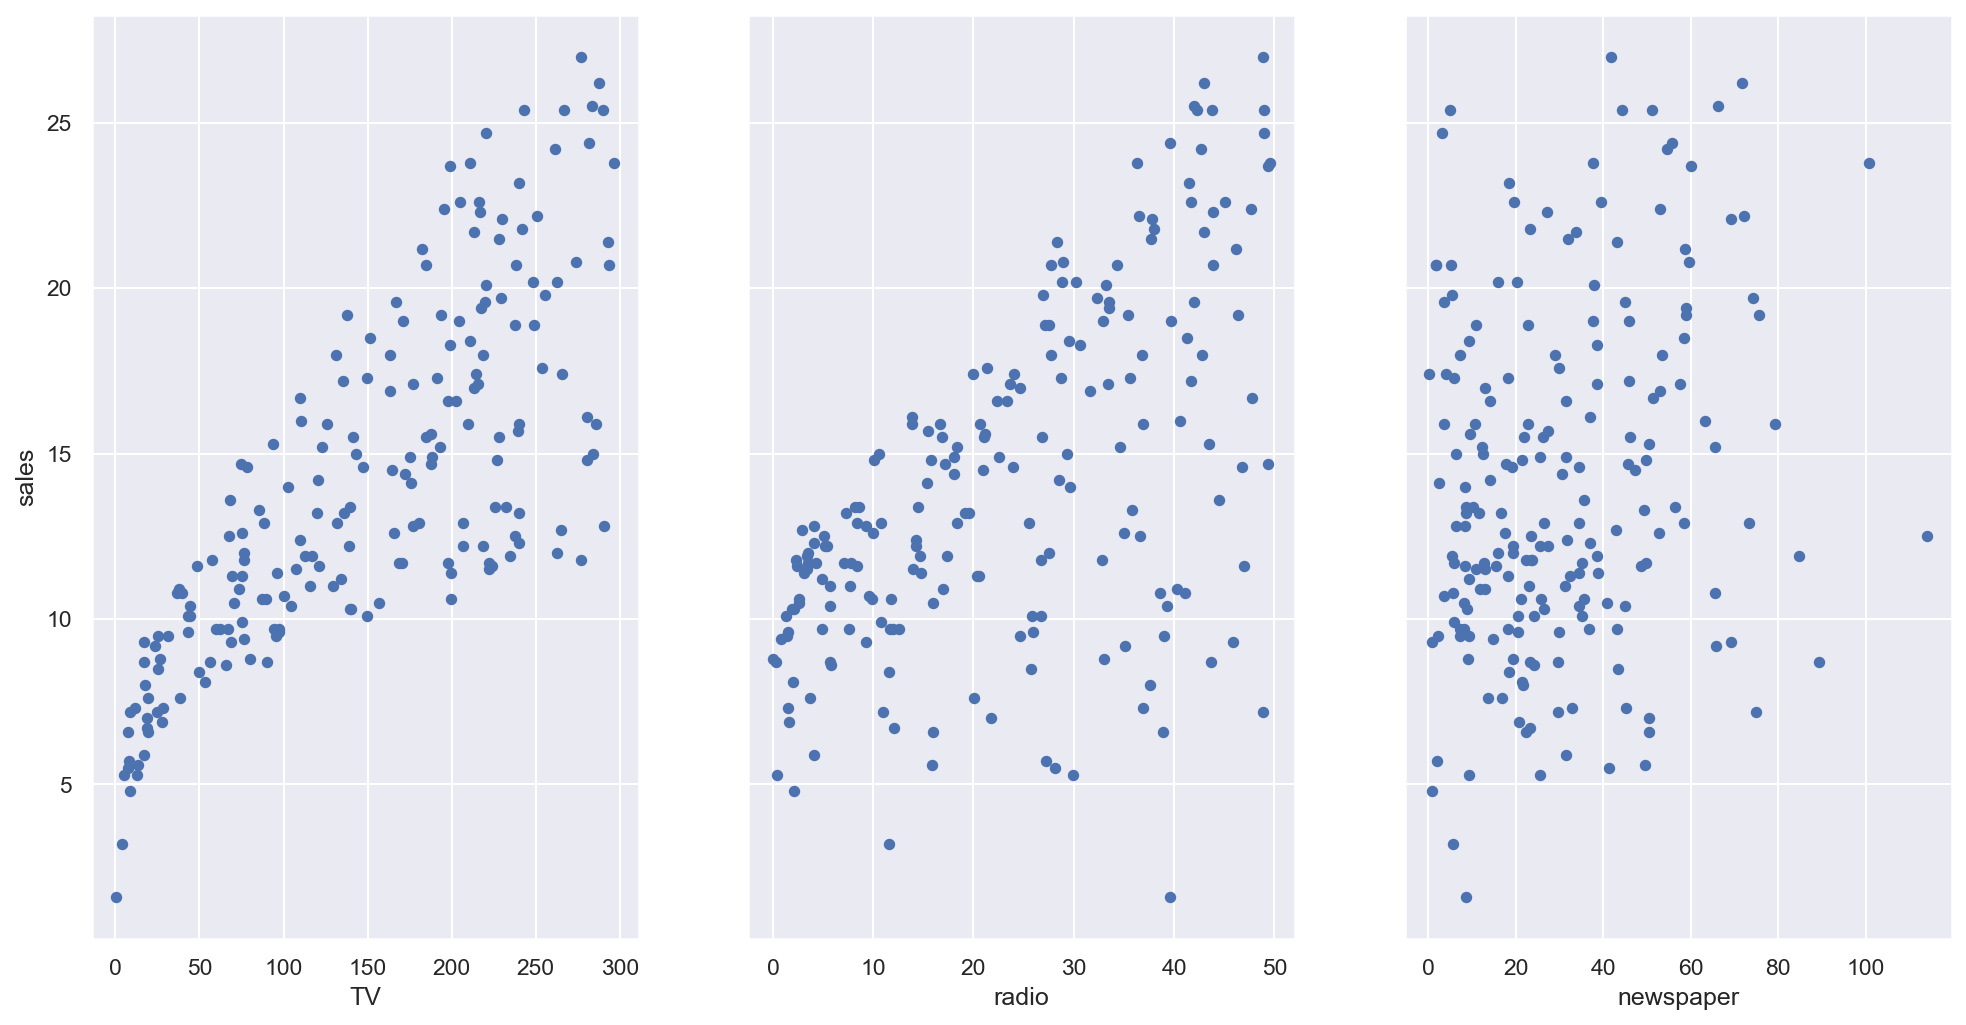

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
advertising_df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
advertising_df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
advertising_df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])


## 1.1 Model Coefficients

In [6]:
# Get model coefficients
import statsmodels.formula.api as smf

# create a fitted model in one line ("ols" = ordinary least squares)
lm = smf.ols(formula='sales ~ TV', data=advertising_df).fit() 

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## 1.2 Make Predictions

In [ ]:
# manually calculate the prediction
7.032594 + 0.047537 * 50
     

In [7]:
# you have to create a DataFrame (Statsmodels formula interface expects it)
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [8]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## 1.3 Plotting the Least Squares Line

In [9]:
# Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [advertising_df["TV"].min(), advertising_df["TV"].max()]})
X_new.head()


,TV
0,0.7
1,296.4


In [10]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds
     

0     7.065869
1    21.122454
dtype: float64

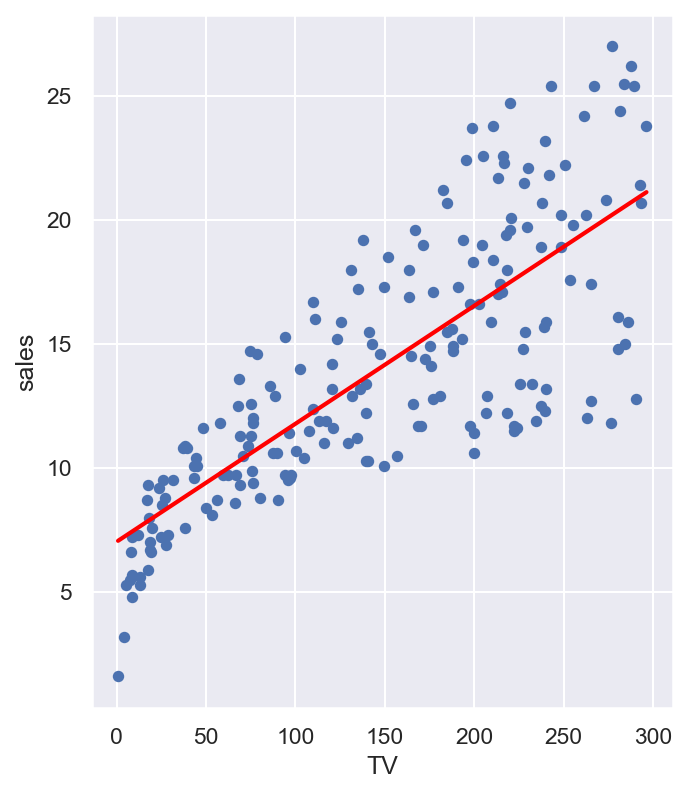

In [11]:
# first, plot the observed data
advertising_df.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## 1.4 Confidence Intervals and P-Values

In [12]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [13]:
# print the p-values for the model coefficients
lm.pvalues
    

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

## 1.5 Model Evaluation

In [14]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

In [ ]:
# Is that a "good" R-squared value? It's hard to say. 
# The threshold for a good R-squared value depends widely on the domain. 
# Therefore, it's most useful as a tool for comparing different models.

# 2. Multiple Linear Regression

In [15]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=advertising_df).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

How do we interpret these coefficients? 
For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

In [16]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        14:13:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?
- TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both positively associated with Sales, whereas Newspaper ad spending is slightly negatively associated with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher R-squared (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.


# 3. Regression in Scikit Learn

In [17]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper'] #here we define feature columns
X = advertising_df[feature_cols]
y = advertising_df["sales"]         #here we define x and y and sales is our prediction target

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients for 'TV', 'radio', 'newspaper'
print(lm.intercept_)
print(lm.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [18]:
# Model Evaluation with R-squared
# calculate the R-squared (from all the data, no train/test split here)
lm.score(X, y)

0.8972106381789522

In [19]:
# predict for a new observation with values for 'TV', 'radio', 'newspaper'
lm.predict([[100, 25, 25]]) #here we spend 100 on tv 25 on radio, 25 on newspapser -- how do those influence the sales?     

C:\Users\Vic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.20266701])

# 4. Regression with train/test-split

In [20]:
# Standard flow for Scikit Learn
from sklearn.model_selection import train_test_split #usually import this
from sklearn.linear_model import LinearRegression

X = advertising_df.drop(["sales", "id"], axis=1) #define x and y
y = advertising_df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #define test split, 80% training 20% Test

lm = LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)


In [21]:
# EVALUATION METRICS
# ==================
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R-squared:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))                             #MAE, RMSE, MSE, r-squared are KPI's
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MSE:", mean_squared_error(y_test, y_pred, squared=True))


R-squared: 0.899438024100912
MAE: 1.4607567168117603
RMSE: 1.78159966153345
MSE: 3.1740973539761033


In [22]:
advertising_df

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# 5. Regression Trees

In [24]:
from sklearn.tree import DecisionTreeRegressor

# (re-)load dataset
advertising_df = pd.read_csv('C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Advertising.csv', index_col=None)

X = advertising_df.drop(["sales", "id"], axis=1)
y = advertising_df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model, fit with training set
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
     
y_pred = dtr.predict(X_test)


In [25]:
# evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error         #scoring functions

print("R-squared:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MSE:", mean_squared_error(y_test, y_pred, squared=True))

# TRY DIFFERENT max_depth-parameter!

R-squared: 0.9310914968293178
MAE: 0.9850000000000001
RMSE: 1.4747881203752624
MSE: 2.175


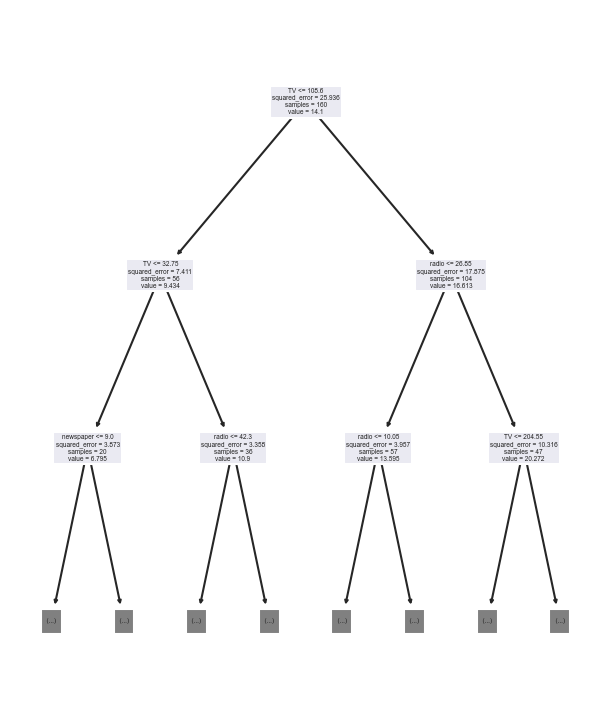

In [26]:
from sklearn import tree
%matplotlib inline

tree.plot_tree(dtr, max_depth=2, feature_names=X.columns)
#plt.figure(figsize=(10,10), dpi=100)
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150
plt.show()
     


# 6. Random Forest Regression
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [27]:
from sklearn.ensemble import RandomForestRegressor

# (re-)load dataset
advertising_df = pd.read_csv('C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Advertising.csv', index_col=None)

X = advertising_df.drop(["sales", "id"], axis=1)
y = advertising_df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model, fit with training set
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
     
y_pred = rf.predict(X_test)


In [28]:
print("R-squared:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MSE:", mean_squared_error(y_test, y_pred, squared=True))

R-squared: 0.976422916037563
MAE: 0.6787500000000002
RMSE: 0.8626572320452665
MSE: 0.7441775000000007
